# Image Denoising using AutoEncoders

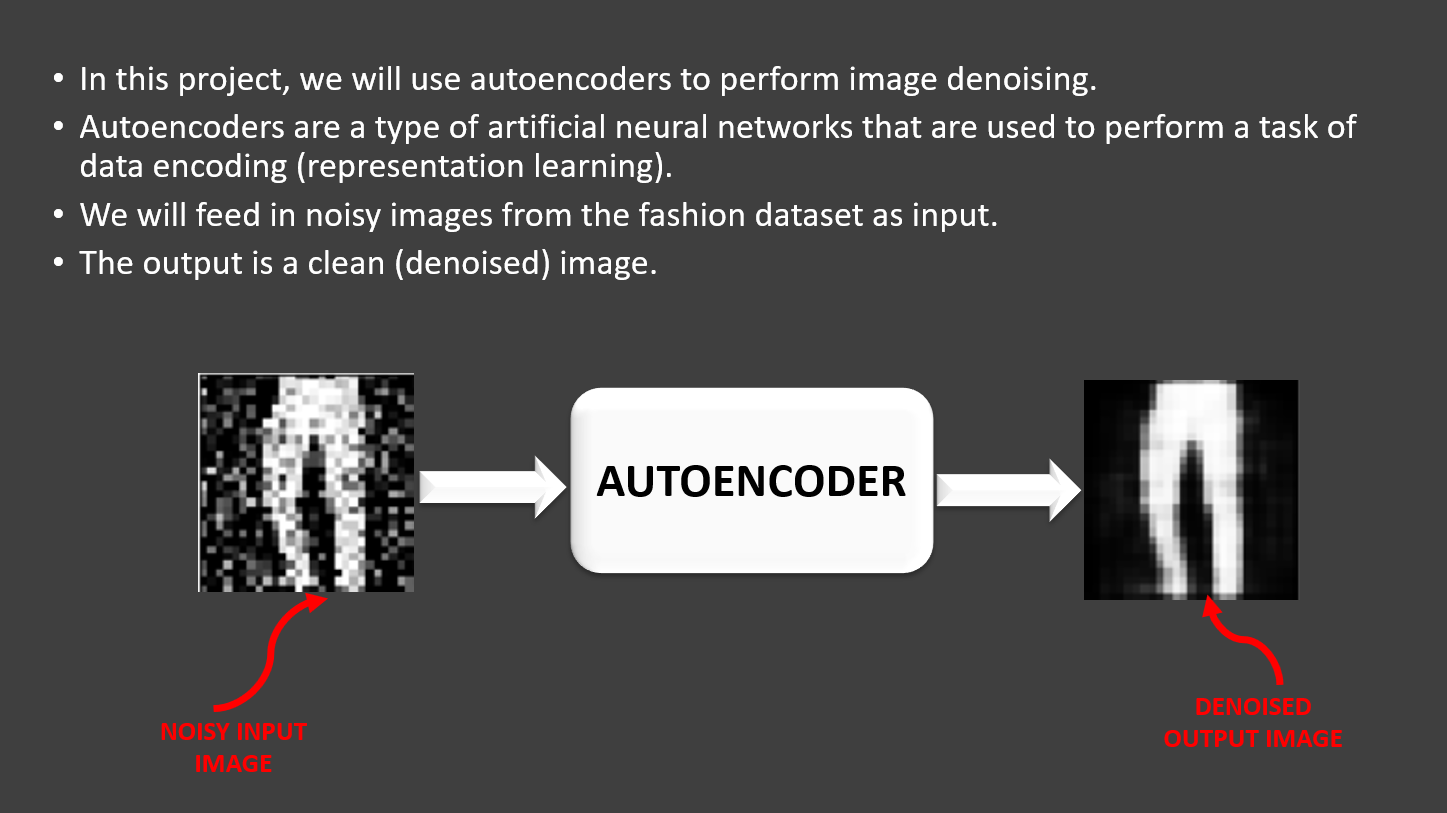

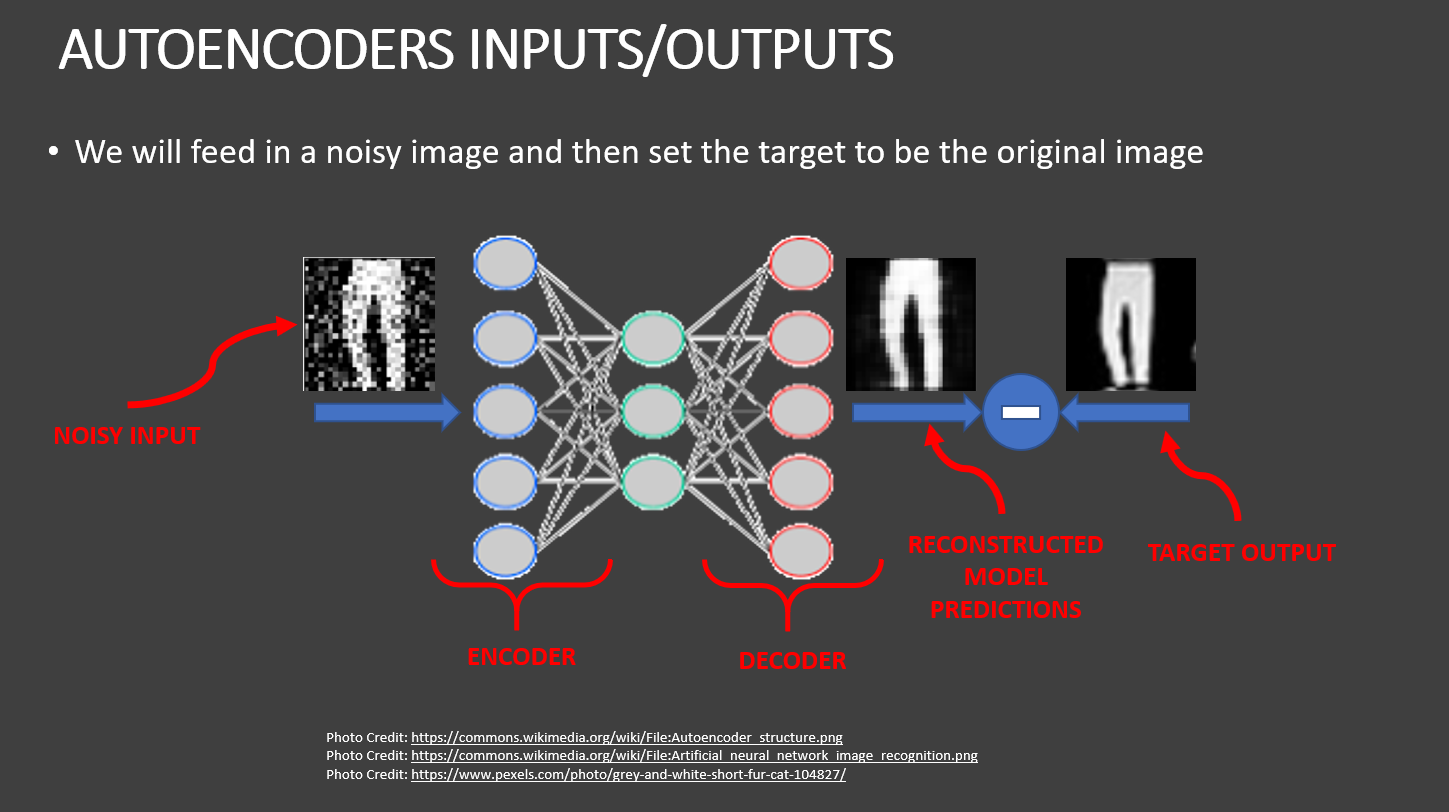

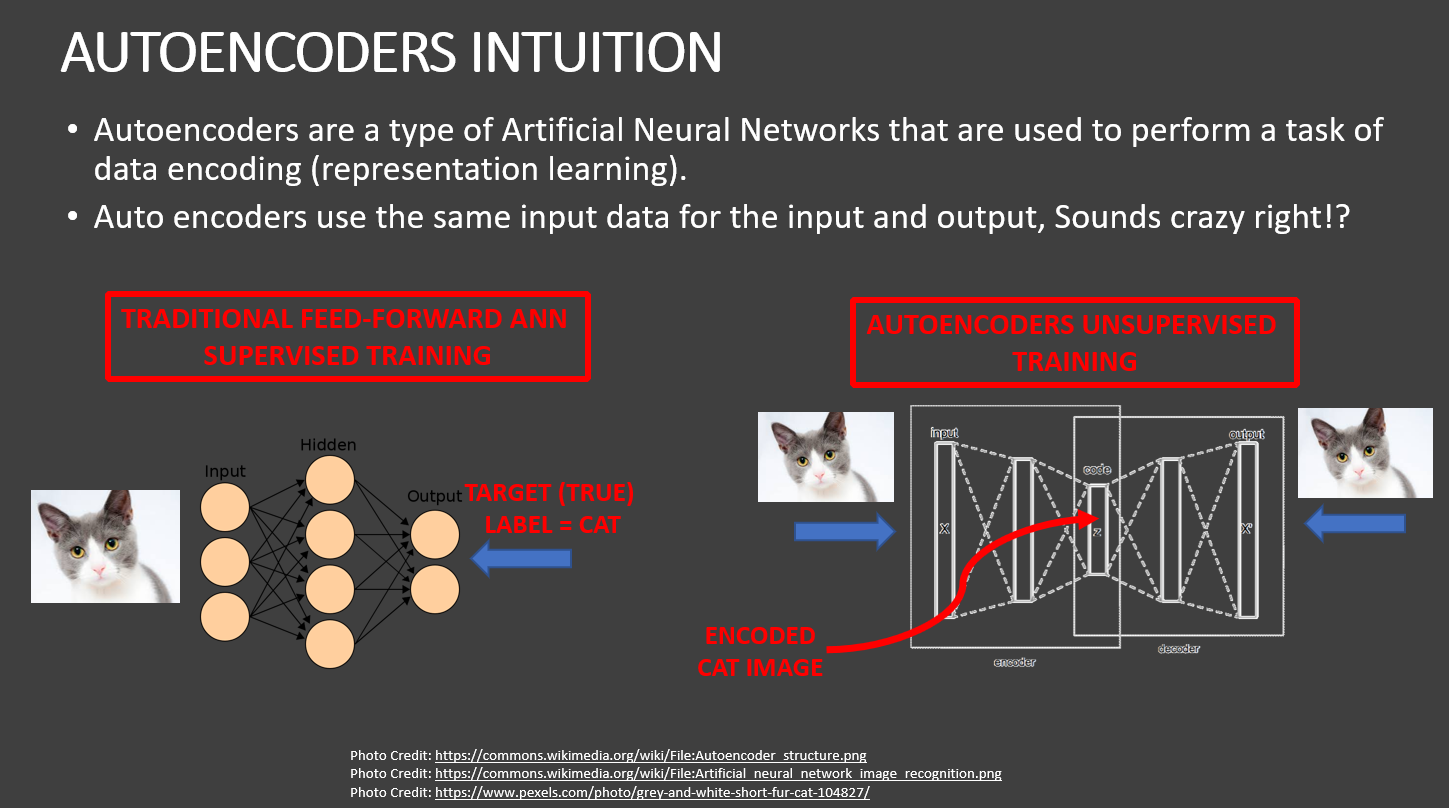

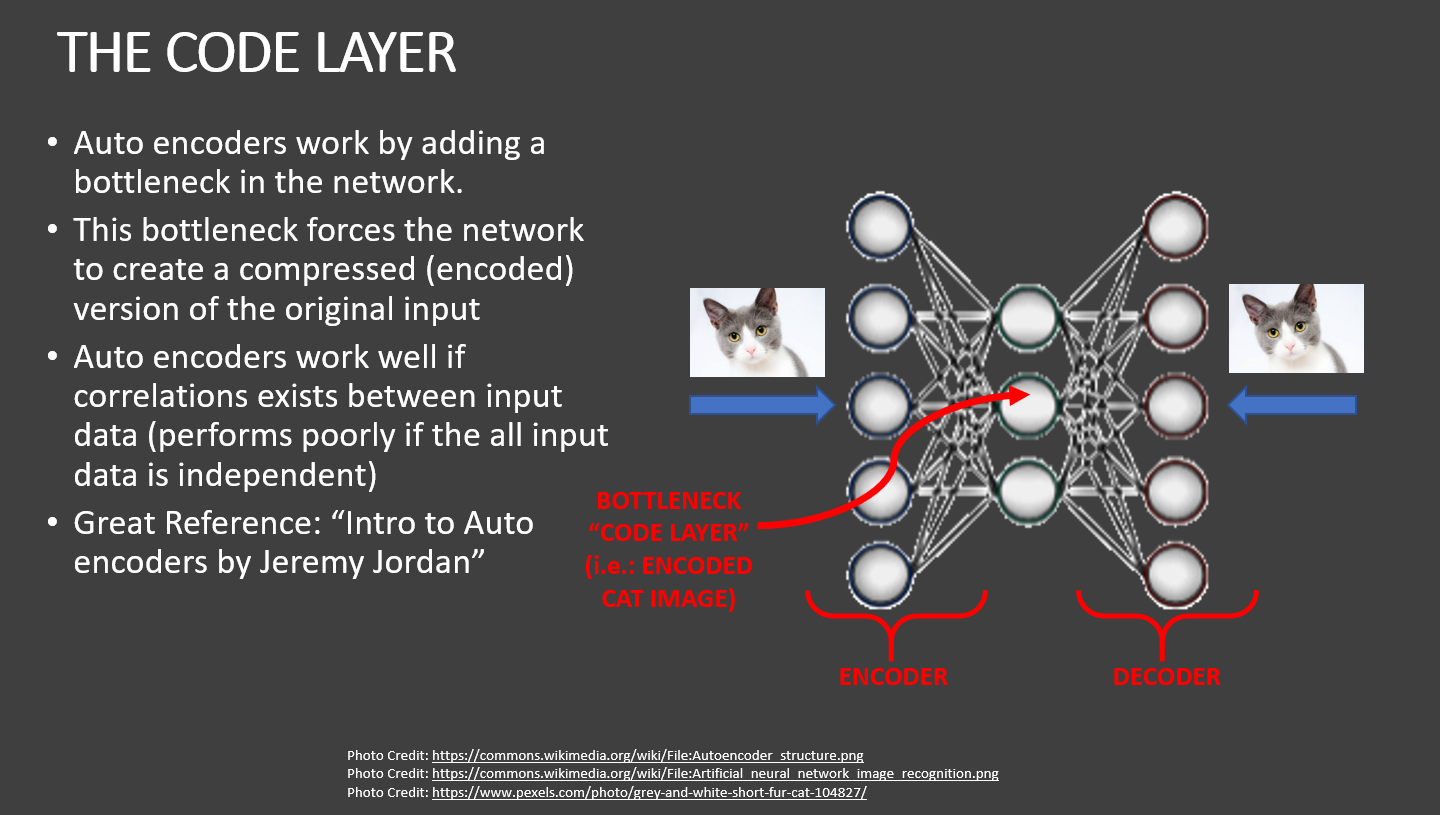

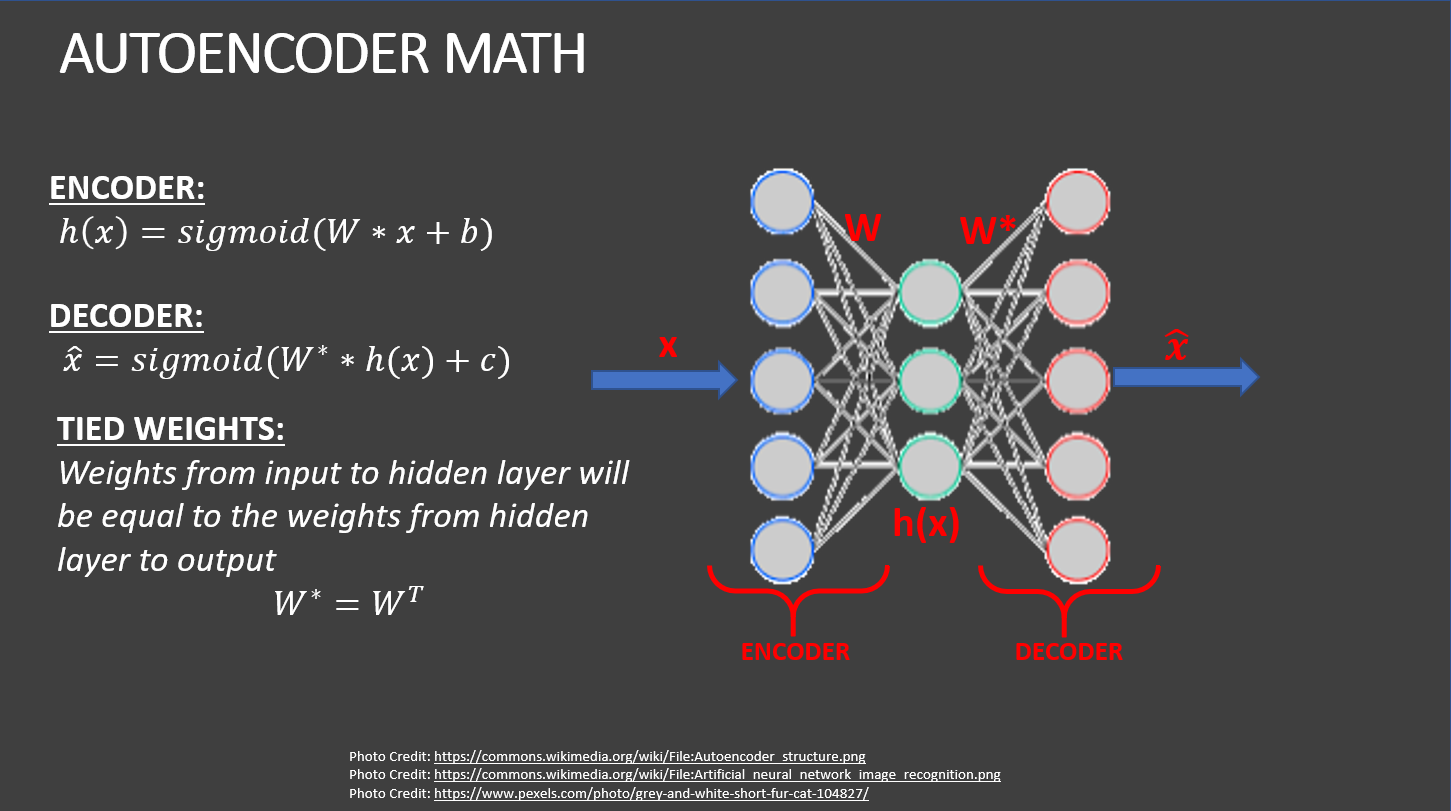

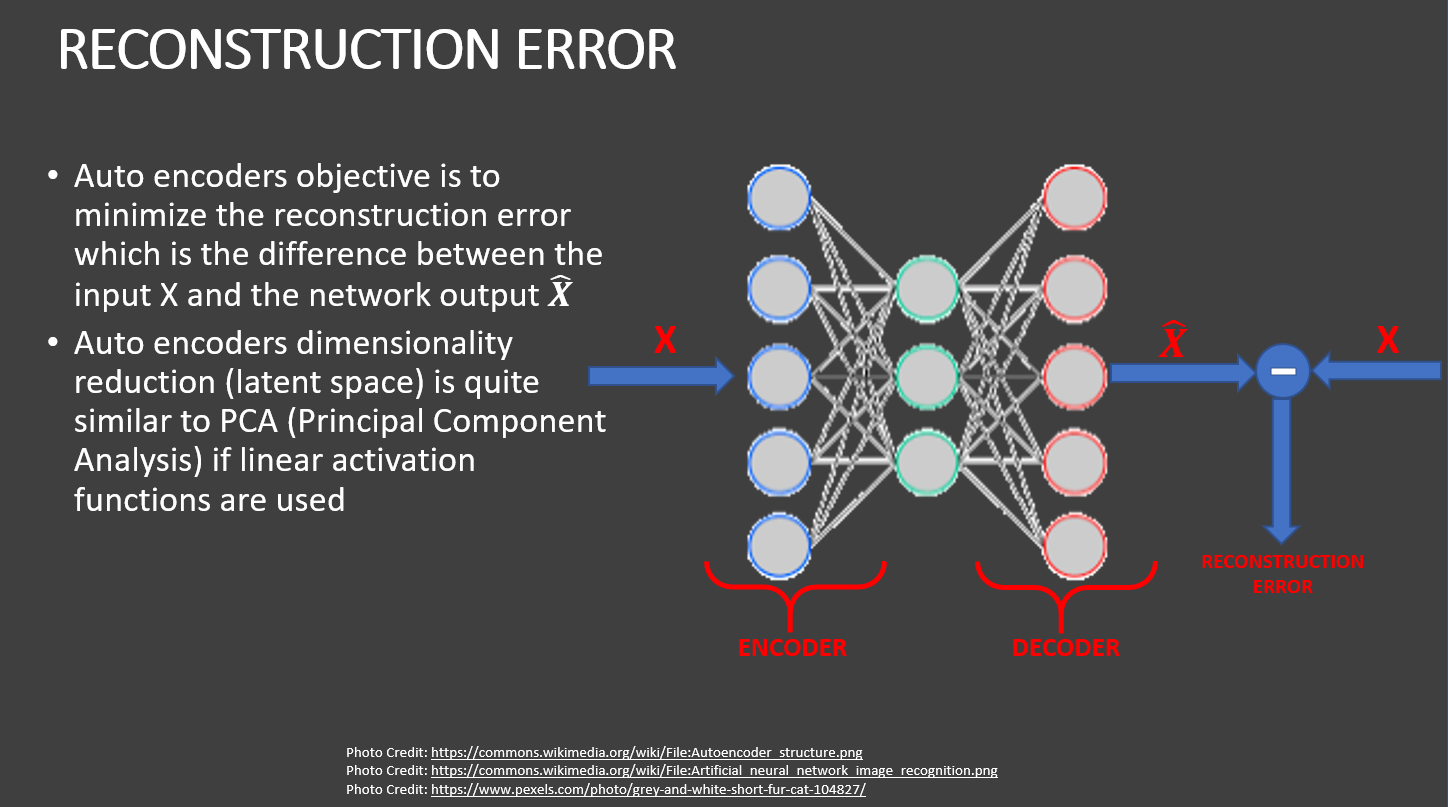

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
# data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 2s 0us/step


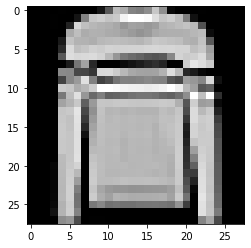

In [8]:
plt.imshow(X_train[5], cmap="gray");

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

# DATA VISUALIZATION

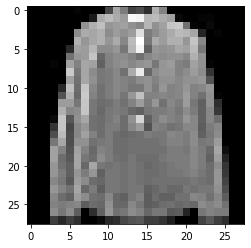

In [9]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray'); # reshape and plot the image

In [10]:
label = y_train[i]
label


6

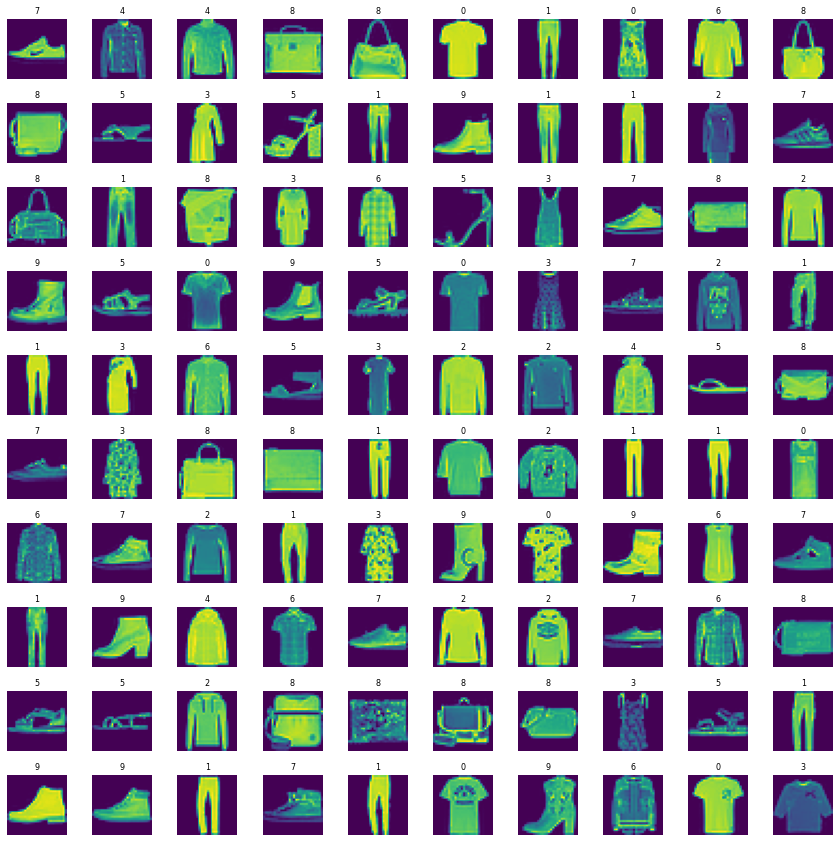

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# DATA PREPROCESSING

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [15]:
noise_dataset = np.array(noise_dataset)

In [16]:
noise_dataset.shape

(60000, 28, 28)

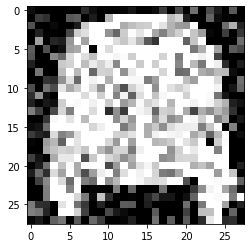

In [19]:
plt.imshow(noise_dataset[7], cmap="gray");

In [20]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

# MODEL

In [21]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


2022-01-11 10:59:20.668575: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainabl

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),          
                X_train.reshape(-1, 28, 28, 1), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Epoch 1/10
300/300 [==============================] - 16s 49ms/step - loss: 0.3942 - val_loss: 0.3229
Epoch 2/10
300/300 [==============================] - 13s 43ms/step - loss: 0.3150 - val_loss: 0.3138
Epoch 3/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3096 - val_loss: 0.3099
Epoch 4/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3064 - val_loss: 0.3076
Epoch 5/10
300/300 [==============================] - 14s 45ms/step - loss: 0.3048 - val_loss: 0.3063
Epoch 6/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3037 - val_loss: 0.3054
Epoch 7/10
300/300 [==============================] - 15s 48ms/step - loss: 0.3029 - val_loss: 0.3046
Epoch 8/10
300/300 [==============================] - 14s 47ms/step - loss: 0.3021 - val_loss: 0.3038
Epoch 9/10
300/300 [==============================] - 13s 44ms/step - loss: 0.3014 - val_loss: 0.3033
Epoch 10/10
300/300 [==============================] - 14s 48ms/step - loss: 0.300

# MODEL PERFORMANCE

In [25]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Loss : {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 6ms/step - loss: 0.3029
Test Loss : 0.303


In [26]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

In [27]:
predicted.shape

(10, 28, 28, 1)

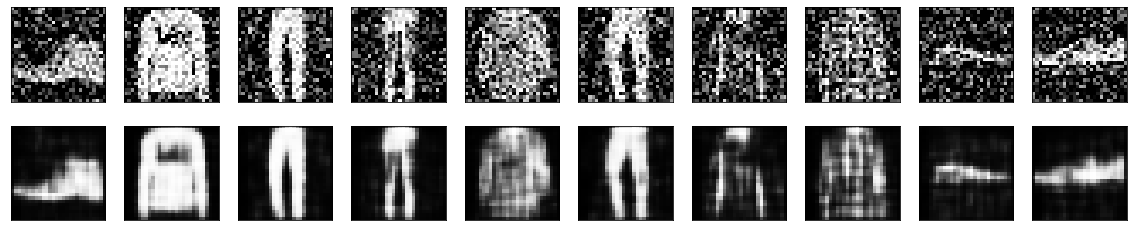

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)